In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [48]:
df = pd.read_csv('titanic.csv')

In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [50]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

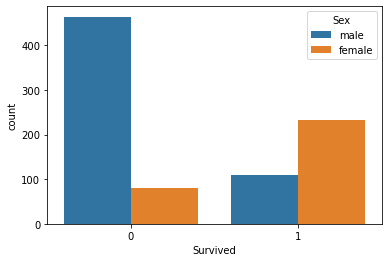

In [51]:
sns.countplot(x = 'Survived',hue = 'Sex',data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

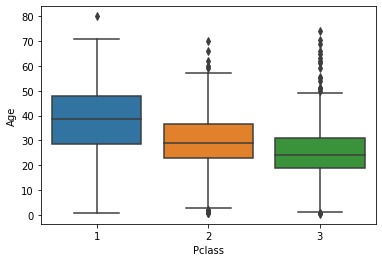

In [52]:
sns.boxplot(x = 'Pclass',y = 'Age',data = df)

<AxesSubplot:>

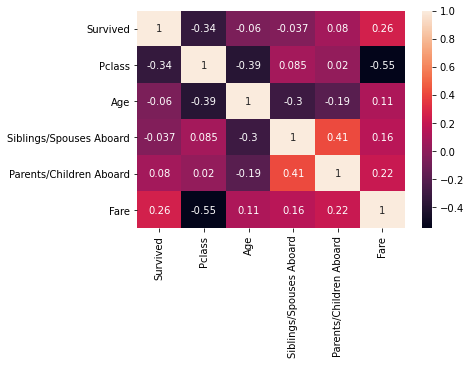

In [53]:
sns.heatmap(data = df.corr(),annot = True)

In [54]:
sex = pd.get_dummies(df.Sex,drop_first=True)

In [55]:
df['Sex'] = sex
Pclass = pd.get_dummies(df['Pclass'],drop_first=True)
Pclass
df = pd.concat([df,Pclass],axis = 1)
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,2,3
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833,0,0
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000,0,0
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000,1,0
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000,0,0
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500,0,1
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000,0,0


In [58]:
df.drop(['Pclass','Name'],axis = 1, inplace = True)
df

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,2,3
0,0,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,1,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,0
4,0,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
882,0,1,27.0,0,0,13.0000,1,0
883,1,0,19.0,0,0,30.0000,0,0
884,0,0,7.0,1,2,23.4500,0,1
885,1,1,26.0,0,0,30.0000,0,0


In [59]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
x_train,x_test,y_train,y_test

(     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  2  \
 76     1  28.0                        0                        0   8.0500  0   
 872    1  20.0                        0                        0   9.8458  0   
 740    1  31.0                        0                        0   7.9250  0   
 132    0  29.0                        1                        0  26.0000  1   
 473    1  34.0                        1                        0  21.0000  1   
 ..   ...   ...                      ...                      ...      ... ..   
 715    1  33.0                        0                        0   7.7750  0   
 767    1  48.0                        0                        0   7.8542  0   
 72     1  26.0                        1                        0  14.4542  0   
 235    1  44.0                        1                        0  26.0000  1   
 37     1  21.0                        0                        0   8.0500  0   
 
      3  
 76   1  
 872  

In [70]:
from sklearn.linear_model import LogisticRegression
Regressor = LogisticRegression()
Regressor.fit(x_train,y_train)

C:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
pred = Regressor.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[131,  31],
       [ 31,  74]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7677902621722846

In [ ]:
As the accuracy is more than 75% this model can be used to make predictions
That mean a person is 76% alive and 24% dead.